# Pattern matching analisys
### Author: Krzysztof Chmielewski
In this section i will compare few pattern finding algorithms. We need to import those algorithms from `utils` directory and also import suffix structures.

In [1]:
import time, psutil, os, sys
import pandas as pd

# Importing suffix structures
from ukkonen import SuffixTree
from suffix_array import SuffixArray

# Importing pattern finding algoritms from previous labs
from utils.naive_pattern_matching import naive_pattern_match
from utils.kmp_algorithm import kmp_pattern_match
from utils.boyer_moore_algorithm import boyer_moore_pattern_match
from utils.rabin_karp_algorithm import rabin_karp_pattern_match
from utils.aho_corasick_algorithm import AhoCorasick

In [2]:
def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024  # in KB

In [3]:
def compare_pattern_matching_algorithms(text: str, pattern: str) -> dict:
    """
    Compare the performance of different pattern matching algorithms.
 
    Args:
        text: The text to search in
        pattern: The pattern to search for
 
    Returns:
        A dictionary containing the results of each algorithm:
        - Execution time in milliseconds
        - Memory usage in kilobytes
        - Number of character comparisons made
        - Positions where the pattern was found
    """
    prior_mem = get_memory_usage()

    # Implement algorithm comparisons
    # For each algorithm:
    #   1. Measure execution time
    #   2. Measure memory usage
    #   3. Count character comparisons
    #   4. Find pattern positions

    # Measuring time and memory usage

    # Naive algorithm time exec and mem usage
    start_time = time.time()
    naive_result, naive_compares = naive_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_naive = get_memory_usage()
    naive_time_exec = (end_time - start_time) * 1000
    naive_mem_usage = mem_after_naive - prior_mem

    # Suffix array time exec and mem usage
    start_time = time.time()
    sa = SuffixArray(text)
    sa.count_compares = True
    sa_result, sa_compares = sa.find_pattern(pattern)
    end_time = time.time()
    mem_after_sa = get_memory_usage()
    sarray_time_exec = (end_time - start_time) * 1000
    sarray_mem_usage = mem_after_sa - naive_mem_usage

    # Suffix tree time exec and mem usage
    start_time = time.time()
    st = SuffixTree(text)
    st.count_compares = True
    st_result, st_compares = st.find_pattern(pattern)
    end_time = time.time()
    mem_after_st = get_memory_usage()
    stree_time_exec = (end_time - start_time) * 1000
    stree_mem_usage = mem_after_st - mem_after_sa

    # KMP time exec and mem usage
    start_time = time.time()
    kmp_result, kmp_compares = kmp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_kmp = get_memory_usage()
    kmp_time_exec = (end_time - start_time) * 1000
    kmp_mem_usage = mem_after_kmp - mem_after_st
    
    # Boyer-Moore time exec and mem usage
    start_time = time.time()
    bm_result, bm_compares = boyer_moore_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_bm = get_memory_usage()
    bm_time_exec = (end_time - start_time) * 1000
    bm_mem_usage = mem_after_bm - mem_after_kmp

    # Rabin-Karp time exec and mem usage
    start_time = time.time()
    rk_result, rk_compares = rabin_karp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_rk = get_memory_usage()
    rk_time_exec = (end_time - start_time) * 1000
    rk_mem_usage = mem_after_rk - mem_after_bm

    # Aho-Corasick time exec and mem usage
    start_time = time.time()
    ac = AhoCorasick([pattern])
    ac_result, ac_compares = ac.search(text)
    end_time = time.time()
    mem_after_ac = get_memory_usage()
    ac_time_exec = (end_time - start_time) * 1000
    ac_mem_usage = mem_after_ac - mem_after_rk

    sa_result.sort()
    st_result.sort()
    kmp_result.sort()
    bm_result.sort()
    rk_result.sort()
    ac_result = [index for index, _ in ac_result]
    ac_result.sort()

    return {
        "Naive": {
            "execution_time_ms": naive_time_exec,
            "memory_usage_kb": naive_mem_usage,
            "compares": naive_compares,
            "results": naive_result
        },
        "Suffix array": {
            "execution_time_ms": sarray_time_exec,
            "memory_usage_kb": sarray_mem_usage,
            "compares": sa_compares,
            "results": sa_result
        },
        "Suffix tree": {
            "execution_time_ms": stree_time_exec,
            "memory_usage_kb": stree_mem_usage,
            "compares": st_compares,
            "results": st_result
        },
        "Knuth-Morris-Pratt": {
            "execution_time_ms": kmp_time_exec,
            "memory_usage_kb": kmp_mem_usage,
            "compares": kmp_compares,
            "results": kmp_result
        },
        "Boyer-Moore": {
            "execution_time_ms": bm_time_exec,
            "memory_usage_kb": bm_mem_usage,
            "compares": bm_compares,
            "results": bm_result
        },
        "Rabin-Karp": {
            "execution_time_ms": rk_time_exec,
            "memory_usage_kb": rk_mem_usage,
            "compares": rk_compares,
            "results": rk_result
        },
        "Aho-Corasick": {
            "execution_time_ms": ac_time_exec,
            "memory_usage_kb": ac_mem_usage,
            "compares": ac_compares,
            "results": ac_result
        }
    }

# Short text comparison

In [4]:
with open('text_samples/short.txt', 'r') as file:
    short_text = file.read()
patterns_for_short = ["ita", "Lorem", "etur adipLorema", "consectetur adipLorema elit, s", "LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i"]
print("Length of text: ", len(short_text))
for p in patterns_for_short:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100
Pattern: ita | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: etur adipLorema | [LENGTH]: 15
Pattern: consectetur adipLorema elit, s | [LENGTH]: 30
Pattern: LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i | [LENGTH]: 80


## Example of pattern matching results

In [5]:
d1 = compare_pattern_matching_algorithms(short_text, patterns_for_short[0])
d1_df = pd.DataFrame(d1)
d1_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,0.016689,0.0875,0.184059,0.021219,0.025511,0.041008,0.033617
memory_usage_kb,0.0,109172.0,0.0,0.0,0.0,0.0,0.0
compares,294,168,4,108,37,97,198
results,[],[],[],[],[],[],[]


# Medium text comparison

In [6]:
with open('text_samples/medium.txt', 'r') as file:
    medium_text = file.read()
patterns_for_medium = ["add", "Lorem", "Maecenas tempus", "natoque penatibus et magnis di", "enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m"]
print("Length of text: ",len(medium_text))
for p in patterns_for_medium:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  1000
Pattern: add | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: Maecenas tempus | [LENGTH]: 15
Pattern: natoque penatibus et magnis di | [LENGTH]: 30
Pattern: enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m | [LENGTH]: 80


## Example of pattern matching results

In [7]:
d2 = compare_pattern_matching_algorithms(medium_text, patterns_for_medium[0])
d2_df = pd.DataFrame(d2)
d2_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,0.12207,1.013279,1.980543,0.146866,0.126123,0.350714,0.134945
memory_usage_kb,0.0,110228.0,256.0,0.0,0.0,0.0,0.0
compares,2994,684,4,1058,353,997,1998
results,[],[],[],[],[],[],[]


# Long text comparison

In [8]:
with open('text_samples/long.txt', 'r') as file:
    long_text = file.read()

patterns_for_long = ["llu", "Lorem", "scelerisque qui", "Maecenas egestas arcu quis lig", "rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli"]
print("Length of text: ", len(long_text))
for p in patterns_for_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  10000
Pattern: llu | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: scelerisque qui | [LENGTH]: 15
Pattern: Maecenas egestas arcu quis lig | [LENGTH]: 30
Pattern: rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli | [LENGTH]: 80


## Example of pattern matching results

In [9]:
d3 = compare_pattern_matching_algorithms(long_text, patterns_for_long[0])
d3_df = pd.DataFrame(d3)
d3_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,0.75388,36.85236,13.498545,0.736237,0.671387,1.970768,0.594616
memory_usage_kb,0.0,160532.0,2944.0,0.0,0.0,0.0,0.0
compares,29994,17223,6,10455,3810,10069,19952
results,"[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2..."


# Very long text comparison

In [10]:
with open('text_samples/verylong.txt', 'r') as file:
    very_long_text = file.read()

patterns_for_very_long = ["lla", "lorem", "volutpat molest", "uer turpis ut velit. Nulla sit", "Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla"]
print("Length of text: ", len(very_long_text))
for p in patterns_for_very_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100000
Pattern: lla | [LENGTH]: 3
Pattern: lorem | [LENGTH]: 5
Pattern: volutpat molest | [LENGTH]: 15
Pattern: uer turpis ut velit. Nulla sit | [LENGTH]: 30
Pattern: Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla | [LENGTH]: 80


## Example of pattern matching results

In [11]:
d4 = compare_pattern_matching_algorithms(very_long_text, patterns_for_very_long[0])
d4_df = pd.DataFrame(d4)
d4_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,7.477283,2645.642996,343.641758,7.347822,6.782532,19.837618,5.764723
memory_usage_kb,0.0,5012116.0,46592.0,0.0,0.0,0.0,128.0
compares,299994,170532,6,104356,38499,101023,199316
results,"[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15..."


# Plotting results of different pattern matching algorithms

In [12]:
import matplotlib.pyplot as plt

text_list = [short_text, medium_text, long_text, very_long_text]
pattern_lists = [patterns_for_short, patterns_for_medium, patterns_for_long, patterns_for_very_long]

## Preparing data for plotting

In [13]:
dtime = dict()
dmem = dict()
dcomp = dict()
for text, patterns in zip(text_list, pattern_lists):
    n = len(text)
    for pattern in patterns:
        m = len(pattern)
        result = compare_pattern_matching_algorithms(text, pattern)
        for algorithm in result.keys():
            dtime[(algorithm, n, m)] = result[algorithm]["execution_time_ms"]
            dmem[(algorithm, n, m)] = result[algorithm]["memory_usage_kb"]
            dcomp[(algorithm, n, m)] = result[algorithm]["compares"]

### Time execution
First we contain data results in Pandas Series so that i will be more readable and easier to access for plotting, then we are able to plot each algorithm behaviour with given text and pattern of different lengths and see how they compare to each other.

In [14]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_time.unstack()

Pattern Length                           3            5            15  \
Algorithm          Text Length                                          
Aho-Corasick       100             0.019312     0.014067     0.020027   
                   1000            0.067472     0.057697     0.071049   
                   10000           0.578165     0.538111     0.608921   
                   100000          6.108046     5.706787     5.411386   
Boyer-Moore        100             0.014067     0.011683     0.009298   
                   1000            0.070810     0.049591     0.028849   
                   10000           0.681162     0.464201     0.212669   
                   100000          7.123232     4.547119     2.369165   
Knuth-Morris-Pratt 100             0.010252     0.009298     0.010252   
                   1000            0.080585     0.074148     0.073433   
                   10000           0.778913     0.754833     0.745773   
                   100000          7.962942     7.467270     7.085800   
Naive              100             0.012159     0.006676     0.006676   
                   1000            0.085354     0.064850     0.061989   
                   10000           0.681639     0.669003     0.767231   
                   100000          6.741285     6.919146     6.562233   
Rabin-Karp         100             0.027895     0.027657     0.035286   
                   1000            0.200748     0.229836     0.298977   
                   10000           2.012968     2.410412     2.993822   
                   100000         20.898581    23.606539    29.425859   
Suffix array       100             0.059128     0.035048     0.035524   
                   1000            1.301765     0.410318     0.394821   
                   10000          13.655424    13.923883    14.112234   
                   100000       1568.764925  1702.957392  1635.190725   
Suffix tree        100             0.112295     0.190496     0.103474   
                   1000            1.146317     0.967264     1.424313   
                   10000          10.223866    51.658392    10.693550   
                   100000        476.701021   377.122164   392.875910   

Pattern Length                           30           80  
Algorithm          Text Length                            
Aho-Corasick       100             0.087738     0.037670  
                   1000            0.073433     0.094652  
                   10000           0.578403     0.617981  
                   100000          5.942345     5.339861  
Boyer-Moore        100             0.009775     0.017643  
                   1000            0.024796     0.025511  
                   10000           0.158787     0.120163  
                   100000          1.444578     0.964165  
Knuth-Morris-Pratt 100             0.008821     0.019312  
                   1000            0.074863     0.077009  
                   10000           0.724792     0.805855  
                   100000          7.533312     7.214069  
Naive              100             0.005722     0.003338  
                   1000            0.060558     0.061035  
                   10000           0.689745     0.646830  
                   100000          7.124186     6.518126  
Rabin-Karp         100             0.038862     0.065088  
                   1000            0.373125     0.601053  
                   10000           3.693819     6.024599  
                   100000         36.520243    72.225332  
Suffix array       100             0.034094     0.036001  
                   1000            0.415325     0.389576  
                   10000          13.805151    14.652729  
                   100000       1541.402340  1600.639582  
Suffix tree        100             0.119686     0.113249  
                   1000            0.999928     1.383543  
                   10000          56.957483    10.530949  
                   100000        463.842630   368.582964

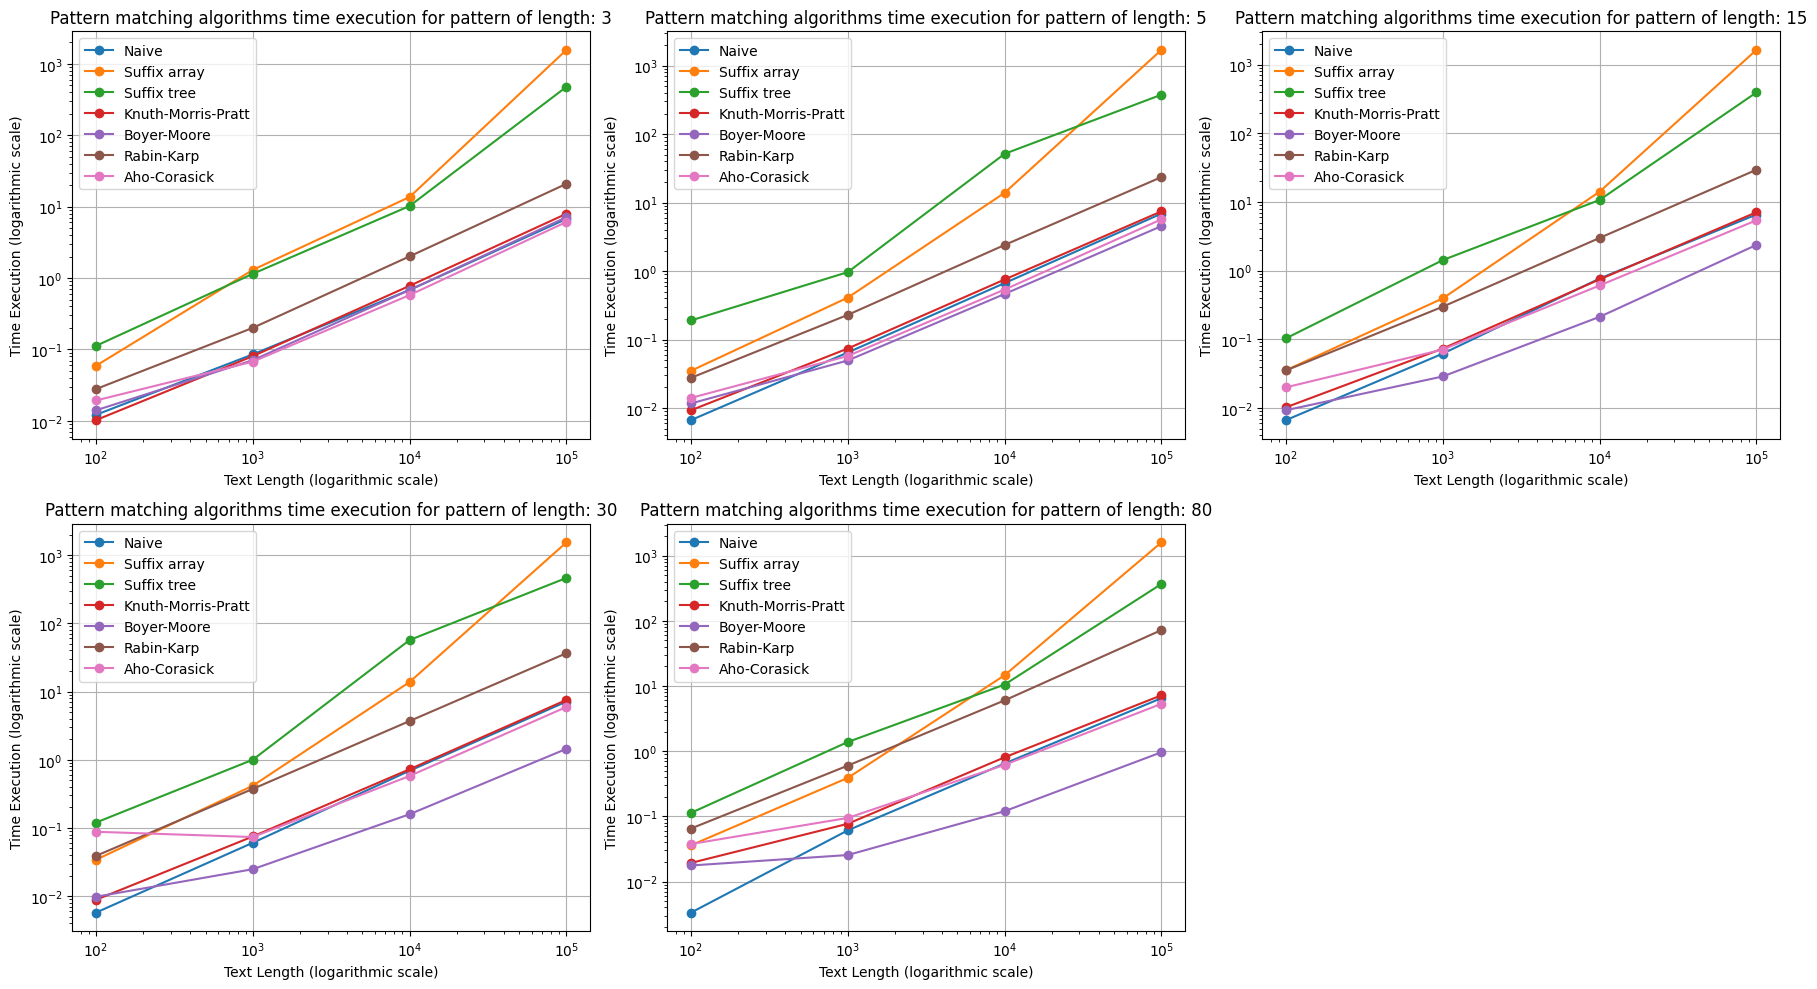

In [15]:
df_time_reset = df_time.reset_index()

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Time Execution (logarithmic scale)')
    plt.title(f'Pattern matching algorithms time execution for pattern of length: {pattern_len}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


### Memory usage

In [16]:
df_mem = pd.Series(dmem)
df_mem.name = 'Memory usage'
df_mem.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_mem.unstack()

Pattern Length                         3          5          15         30  \
Algorithm          Text Length                                               
Aho-Corasick       100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Boyer-Moore        100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Knuth-Morris-Pratt 100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000           128.0        0.0        0.0        0.0   
Naive              100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Rabin-Karp         100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Suffix array       100          5063512.0  5063512.0  5063512.0  5063512.0   
                   1000         5063512.0  5063512.0  5063512.0  5063512.0   
                   10000        5063512.0  5064024.0  5064152.0  5064152.0   
                   100000       5071320.0  5086628.0  5089700.0  5091236.0   
Suffix tree        100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0      128.0        0.0        0.0   
                   100000         11904.0        0.0        0.0      384.0   

Pattern Length                         80  
Algorithm          Text Length             
Aho-Corasick       100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Boyer-Moore        100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Knuth-Morris-Pratt 100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Naive              100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Rabin-Karp         100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Suffix array       100          5063512.0  
                   1000         5063512.0  
                   10000        5064152.0  
                   100000       5091620.0  
Suffix tree        100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0

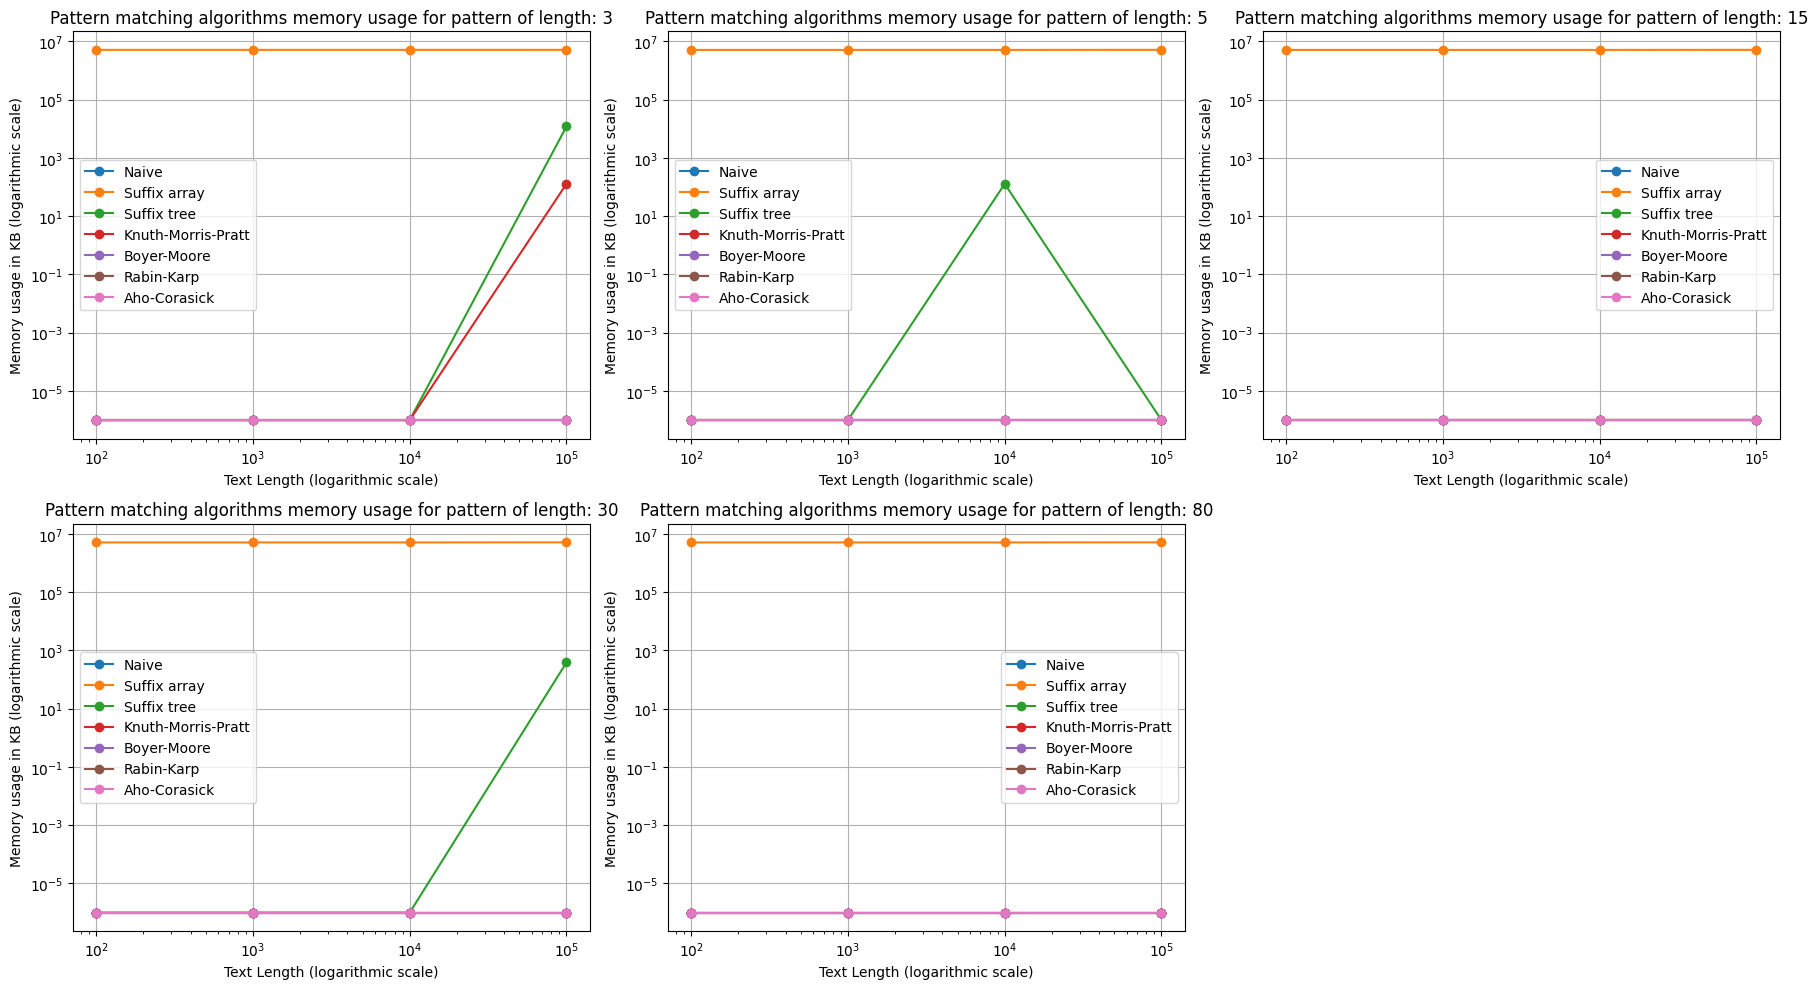

In [17]:
df_mem_reset = df_mem.reset_index()

algorithms = df_mem_reset['Algorithm'].unique()
pattern_lengths = df_mem_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_mem_reset[(df_mem_reset['Algorithm'] == algo) & 
                               (df_mem_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Memory usage'].replace(0, 1e-6), marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Memory usage in KB (logarithmic scale)')
    plt.title(f'Pattern matching algorithms memory usage for pattern of length: {pattern_len}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Number of comparisons

In [18]:
df_comp = pd.Series(dcomp)
df_comp.name = 'Characters comparison'
df_comp.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_comp.unstack()

Pattern Length                      3       5        15       30       80
Algorithm          Text Length                                           
Aho-Corasick       100             198     188      185      171      121
                   1000           1998    1996     1986     1967     1894
                   10000         19952   19992    19915    19929    19879
                   100000       199316  199347   199299   198678   198892
Boyer-Moore        100              37      41       24       34       81
                   1000            353     255      135      111      119
                   10000          3810    2390     1138      774      598
                   100000        38499   24275    12461     8171     5799
Knuth-Morris-Pratt 100             108     102      108      102      100
                   1000           1058    1000     1000     1049     1101
                   10000         10455   10000    10685    10012    10430
                   100000       104356  104964   101114   107615   100130
Naive              100             294     480     1290     2130     1680
                   1000           2994    4980    14790    29130    73680
                   10000         29994   49980   149790   299130   793680
                   100000       299994  499980  1499790  2999130  7993680
Rabin-Karp         100              97     110      100      100      100
                   1000            997    1000     1000     1000     1000
                   10000         10069   10005    10015    10000    10000
                   100000       101023  100375   100135   100270   100800
Suffix array       100             168     110      735      930     1440
                   1000            684    1035     3120    19320    30960
                   10000         17223    9925   122220    59580   600320
                   100000       170532  288695  1497570  2782500  1520880
Suffix tree        100               4       7       18       32       83
                   1000              4       6       16       34       85
                   10000             6       6       20       34       85
                   100000            6       9       19       35       84

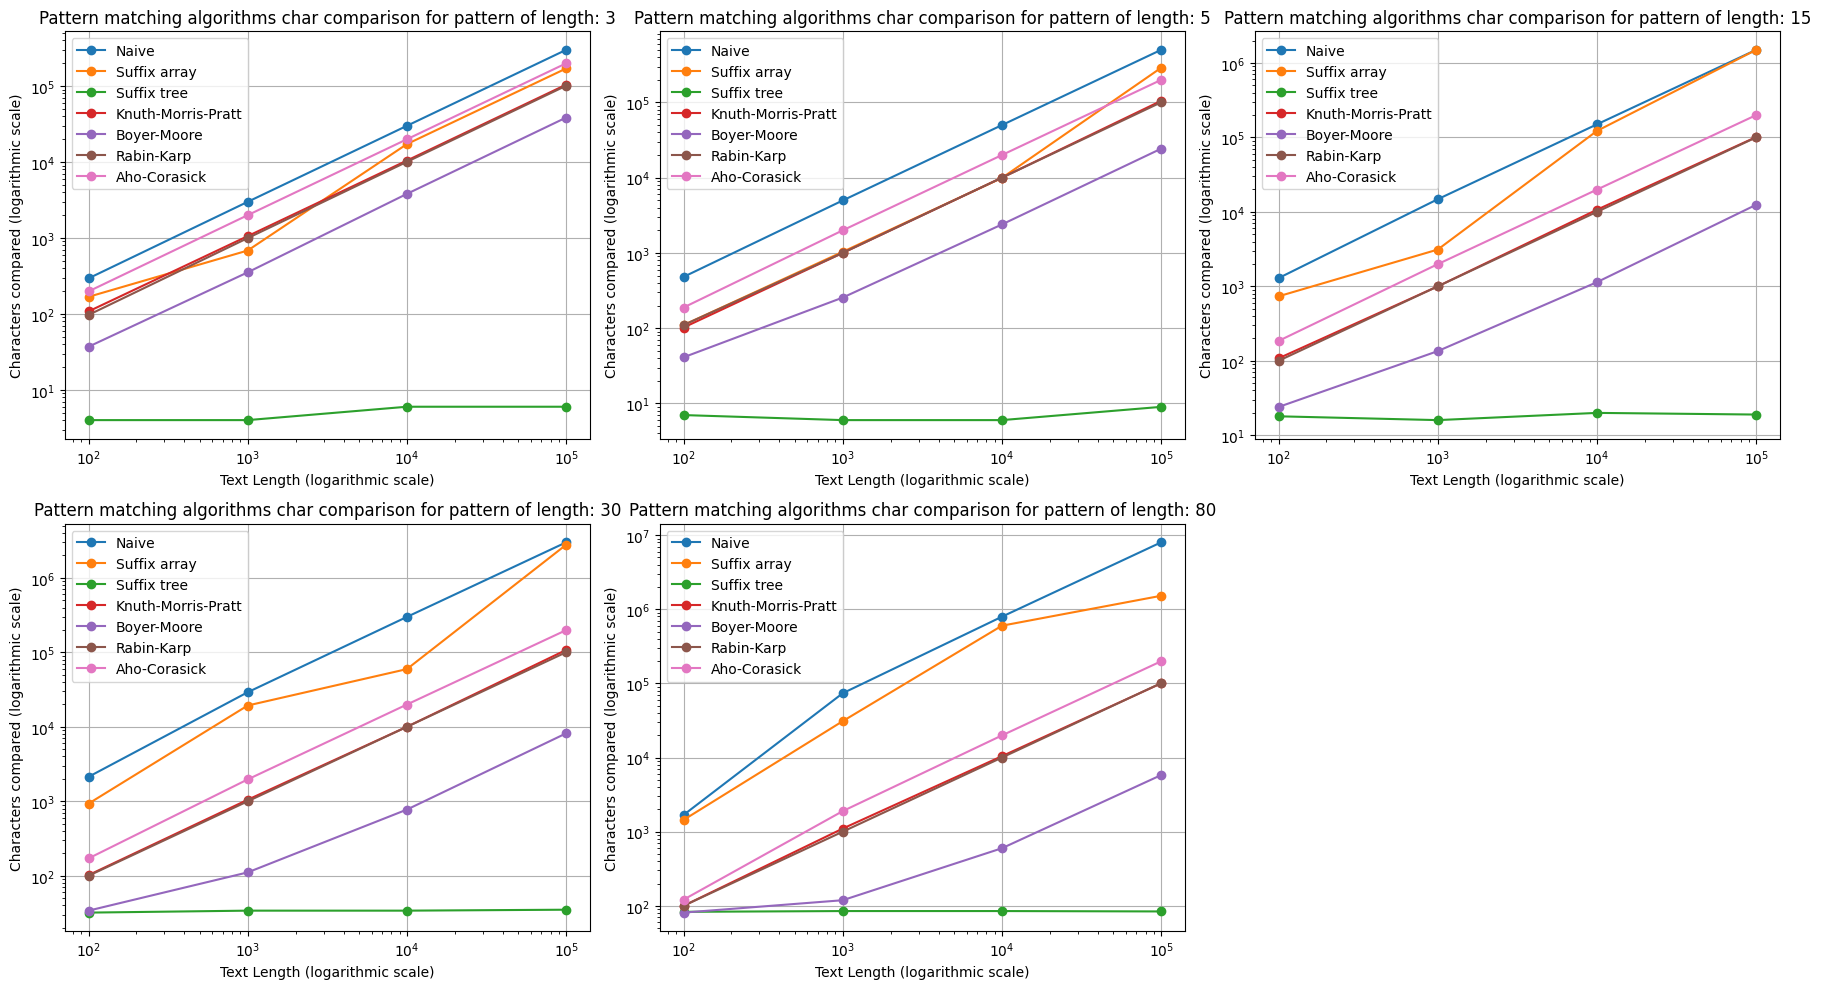

In [19]:
df_comp_reset = df_comp.reset_index()

algorithms = df_comp_reset['Algorithm'].unique()
pattern_lengths = df_comp_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_comp_reset[(df_comp_reset['Algorithm'] == algo) & 
                               (df_comp_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Characters comparison'], marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Characters compared (logarithmic scale)')
    plt.title(f'Pattern matching algorithms char comparison for pattern of length: {pattern_len}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()